In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv(r'C:\Users\hp\Desktop\bezen\2022_02_08-02_30_31_AM.csv')

In [3]:
# show the first 5 rows of the dataset
# to ensure proper import of the dataset.
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [4]:
# the number of entries in the dataset
# w.r.t rows and columns
df.shape

(13730000, 6)

In [5]:
# show datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


In [6]:
# find null values in the dataset
df.isnull().sum()

uuid                       0
price_string         8220000
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

In [7]:
# we will handle the missing values by deleting it from the data.
# since the data is big it is possible to delete missing entries.
df = df[df['product_type'].notna()]

In [8]:
# all the null categories are also removed
# now remove the level_1 column null values
df = df[df['level_1'].notna()]

## 1. Products without prices.

In [9]:
# one way to check if price_string column and price_string_unf column has same values is by using for loop
# if the values are same replace price_string_unf with nan
# since the dataset is big we will avoid looping over the data as much as possible
# Example of for loop:
'''
  for i in range(len(df)):
    if (str(df['price_string'][i]) in str(df['price_string_unf'][i]) and str(df['price_string_unf'][i])!='nan'):
       df['price_string_unf']= df['price_string_unf'].replace(to_replace = str(df['price_string_unf'][i]) , value = np.nan)
'''

"\n  for i in range(len(df)):\n    if (str(df['price_string'][i]) in str(df['price_string_unf'][i]) and str(df['price_string_unf'][i])!='nan'):\n       df['price_string_unf']= df['price_string_unf'].replace(to_replace = str(df['price_string_unf'][i]) , value = np.nan)\n"

In [10]:
# count unique values in the price_string_unf column
df['price_string_unf'].value_counts()

$6.75                               30000
$11.99                              20000
$49.00                              20000
$85 USD                             20000
$10.00                              10000
$198.00                             10000
$52 USD                             10000
$80 USD                             10000
$50 USD                             10000
$138.00\n\n\n\n$96.60               10000
$25.00                              10000
$29.00                              10000
$178.00\n\n\n\n$59.50               10000
$95 USD                             10000
Current price: \n$359.00            10000
$99.00                              10000
Current price: \n$329.40            10000
$178.00\n\n\n\n$64.50               10000
$248.00\n\n\n\n$104.50 - $248.00    10000
$24.00                              10000
$41 USD                             10000
$619.00                             10000
$459.99                             10000
$18.95                            

**We can see that some of the pricing are different than the others. We need to filter this data and have clean price.**

In [11]:
# remove USD in the price_string_unf column
df['price_string_unf'] = df['price_string_unf'].str.replace('USD', '')

In [12]:
# remove trailing spaces
df['price_string_unf'] = df['price_string_unf'].str.strip()

In [13]:
# remove '$' sign from the price_string_unf
# remove /n or next line from the prices of price_string_unf column

df['price_string_unf'] = df['price_string_unf'].str.replace('$','').str.replace('\n','').astype('string')

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\3957508119.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_string_unf'] = df['price_string_unf'].str.replace('$','').str.replace('\n','').astype('string')


In [14]:
df['price_string_unf'].value_counts()

6.75                     30000
49.00                    20000
85                       20000
11.99                    20000
99.00                    10000
15.00                    10000
18.95                    10000
459.99                   10000
619.00                   10000
41                       10000
24.00                    10000
248.00104.50 - 248.00    10000
178.0064.50              10000
Current price: 329.40    10000
95                       10000
Current price: 359.00    10000
178.0059.50              10000
29.00                    10000
25.00                    10000
138.0096.60              10000
50                       10000
80                       10000
52                       10000
198.00                   10000
10.00                    10000
30.00                    10000
Name: price_string_unf, dtype: Int64

**Now we are left with only 6 type of prices which are not in the proper format.** 

In [15]:
# describe each type of the prices to get info about them.
# notice the value in price_string column of each.

df[df['price_string_unf']=='Current price: 329.40'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,0,10000,10000,10000,10000
unique,1,0,1,1,1,1
top,22c4b6af-6809-4ea1-9f1c-802a19246025,NaN,Current price: 329.40,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
freq,10000,NaN,10000,10000,10000,10000


In [16]:
df[df['price_string_unf']=='248.00104.50 - 248.00'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,0,10000,10000,10000,10000
unique,1,0,1,1,1,1
top,ff30484a-a51c-4027-b9b7-12ee239b3a94,NaN,248.00104.50 - 248.00,UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,NaN,10000,10000,10000,10000


In [17]:
df[df['price_string_unf']=='Current price: 359.00'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,0,10000,10000,10000,10000
unique,1,0,1,1,1,1
top,13724827-979f-4019-9ff1-b44e57af5802,NaN,Current price: 359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
freq,10000,NaN,10000,10000,10000,10000


In [18]:
df[df['price_string_unf']=='138.0096.60'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,0,10000,10000,10000,10000
unique,1,0,1,1,1,1
top,ce5f2b6d-06a8-4231-b358-835905a314fa,NaN,138.0096.60,UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,NaN,10000,10000,10000,10000


In [19]:
# notice that price_string column has price $178
df[df['price_string_unf']=='178.0059.50'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,10000,10000,10000,10000,10000
unique,1,1,1,1,1,1
top,5daa829a-1c4e-46d9-a886-87dfa6c846db,$178,178.0059.50,UGx1cyBzaXplIHdlYXI,VG9w,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,10000,10000,10000,10000,10000


In [20]:
# notice that price_string column has price $178
df[df['price_string_unf']=='178.0064.50'].describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,10000,10000,10000,10000,10000,10000
unique,1,1,1,1,1,1
top,02213b64-6b87-44cb-924c-4b3ace93002f,$178,178.0064.50,UGx1cyBzaXplIHdlYXI,UGFudA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,10000,10000,10000,10000,10000


**Assumption -**
from the two prices present in a single entry I've chosen the higher value to continue analysis.

In [21]:
# replace 138.0096.60 with 138.00
df['price_string_unf']= df['price_string_unf'].str.replace('138.0096.60', '138.00')

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\725749742.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('138.0096.60', '138.00')


In [22]:
# replace 248.00104.50 - 248.00 with 248.00
df['price_string_unf']= df['price_string_unf'].str.replace('248.00104.50 - 248.00', '248.00')

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\2264280283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('248.00104.50 - 248.00', '248.00')


In [23]:
# replace Current price: 359.00 with 359.00
df['price_string_unf']= df['price_string_unf'].str.replace('Current price: 359.00', "359.00")

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\2925659238.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('Current price: 359.00', "359.00")


In [24]:
# replace Current price: 359.00 with 359.00
df['price_string_unf']= df['price_string_unf'].str.replace('Current price: 329.40', "329.40")

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\2903615054.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('Current price: 329.40', "329.40")


In [25]:
# replace 178.0059.50 with 178.00
df['price_string_unf']= df['price_string_unf'].str.replace('178.0059.50', "178.00")

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\1421266874.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('178.0059.50', "178.00")


In [26]:
# replace 178.0064.50 with 178.00
df['price_string_unf']= df['price_string_unf'].str.replace('178.0064.50', "178.00")

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\326299574.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price_string_unf']= df['price_string_unf'].str.replace('178.0064.50', "178.00")


In [27]:
# checking that we have replaced by extracting random samples from the dataframe. 
df[df['price_string_unf']=='248.00'].sample(n=2)

,uuid,price_string,price_string_unf,product_type,level_1,category
951517,ff30484a-a51c-4027-b9b7-12ee239b3a94,NaN,248.00,UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
4987540,ff30484a-a51c-4027-b9b7-12ee239b3a94,NaN,248.00,UGx1cyBzaXplIHdlYXI,Q29hdC9KYWNrZXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [28]:
# let's take one mre example of using sample in dataframe
df[df['price_string_unf']=='138.00'].sample(n=2)

,uuid,price_string,price_string_unf,product_type,level_1,category
7932718,ce5f2b6d-06a8-4231-b358-835905a314fa,NaN,138.00,UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
9626609,ce5f2b6d-06a8-4231-b358-835905a314fa,NaN,138.00,UGx1cyBzaXplIHdlYXIgc2tpcnQ,U2tpcnQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [29]:
# format the price as '$' prefix and upto two decimal places.
df['price_string_unf'] = df['price_string_unf'].astype('float').apply('${0:.2f}'.format)

In [30]:
# check if the data is properly formatted
df['price_string_unf'].value_counts()

$nan       13370000
$6.75         30000
$49.00        20000
$85.00        20000
$178.00       20000
$11.99        20000
$10.00        10000
$198.00       10000
$52.00        10000
$80.00        10000
$50.00        10000
$138.00       10000
$25.00        10000
$29.00        10000
$95.00        10000
$99.00        10000
$359.00       10000
$329.40       10000
$248.00       10000
$24.00        10000
$41.00        10000
$619.00       10000
$459.99       10000
$18.95        10000
$15.00        10000
$30.00        10000
Name: price_string_unf, dtype: int64

In [31]:
# we have saved nul values as $nan
# therefore replace $nan with null values
df['price_string_unf'] = df['price_string_unf'].astype('string').replace('$nan',np.nan)

In [32]:
df['price_string_unf'].value_counts()

$6.75      30000
$85.00     20000
$178.00    20000
$11.99     20000
$49.00     20000
$10.00     10000
$15.00     10000
$18.95     10000
$459.99    10000
$619.00    10000
$41.00     10000
$24.00     10000
$248.00    10000
$329.40    10000
$25.00     10000
$99.00     10000
$29.00     10000
$138.00    10000
$50.00     10000
$80.00     10000
$52.00     10000
$198.00    10000
$95.00     10000
$359.00    10000
$30.00     10000
Name: price_string_unf, dtype: Int64

In [33]:
# fill null values in price_string column
# where the price_string_unf is not null.
df.price_string.fillna(df.price_string_unf, inplace=True)

Text(0.5, 1.0, 'Number of product types with and without prices')

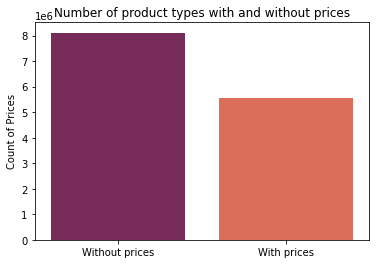

In [34]:
# plotting graph of with prices and without prices
count_values = df['price_string'].isna().value_counts().values

sns.barplot(x=['Without prices','With prices'], y=count_values , palette = 'rocket')
plt.ylabel('Count of Prices')
plt.title("Number of product types with and without prices")

In [35]:
# unique products and thier count.
df['product_type'].value_counts()

U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM                       200000
V29tZW5zIHN3aW13ZWFy                                      190000
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg                    170000
R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIGFkdWx0cw    150000
UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw                150000
                                                           ...  
U3Vuc2NyZWVu                                               10000
QmFieSBDcmVhbXMgYW5kIExvdGlvbnM                            10000
bWVucyBTaGF2aW5nIEtpdA                                     10000
bWVucyBCZWFyZCBDYXJlIEtpdA                                 10000
QmFieSBTb2Fw                                               10000
Name: product_type, Length: 321, dtype: int64

In [36]:
# locate the price string which is na
# and find its product type and the number of products
products = df.loc[df['price_string'].isna(),'product_type'].unique()

In [37]:
# checkout few for reference
products

array(['TGFwdG9wIENvdmVycy9CYWdz', 'QmFraW5nIEN1cHMgYW5kIE1hdHM',
       'TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg',
       'U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM',
       'UGx1cyBzaXplIHdlYXIgZHJlc3M', 'TWF0ZXJuaXR5IFBhZHM',
       'RWR1Y2F0aW9uYWwgQmxvY2tzL1RveXM',
       'UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw',
       'Q2FuZGxlcy9GcmFnbmFuY2Vz', 'bWVucyBCb2R5IFNvYXAvIEJvZHl3YXNo',
       'TGVnb3M', 'RG9sbCBob3VzZSAvIEZpZ3VyZXM', 'UGV0IGNvbGxhcnM',
       'TmF0dXJhbCBQaWdtZW50cyA', 'UG9wY29ybg', 'U2F1Y2U',
       'VGhlcm1vc3RhdHM',
       'UHJvZHVjZSBCYWdzIGFuZCBHcm9jZXJ5IFRvdGUgQmFncw',
       'U2xlZXAgc2hvcnRz', 'RXllIG1hc2s', 'V29tZW5zIHN3aW13ZWFy',
       'UGlsbG93Y2FzZXM', 'R3Jhbm9sYSBCYXJz', 'V29tZW5zIFBhbnRz',
       'QmFieSBXaXBlcw', 'RmxvdXI', 'SnVtcHN1aXRzL092ZXJhbGw',
       'U2xlZXAgRHJlc3M', 'TGV0dGVyIFZpdGFtaW5z',
       'Q29uZGl0aW9uZXIgSGFpcg', 'Rm9vZCBTdG9yYWdl',
       'TnV0cyAtIEFsbW9uZHM', 'UHJlZ25hbmN5IHZpdGFtaW5z',
       'cGV0IEJsYW5rZXQ', 'T21lZ2EzIGNhcHN1bGVz',


In [38]:
# convert the caculated products array into dataframe
product_without_prices = pd.DataFrame(products)
product_without_prices.columns = ['product_type'] # change column names
product_without_prices.head(10)

,product_type
0,TGFwdG9wIENvdmVycy9CYWdz
1,QmFraW5nIEN1cHMgYW5kIE1hdHM
2,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg
3,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM
4,UGx1cyBzaXplIHdlYXIgZHJlc3M
5,TWF0ZXJuaXR5IFBhZHM
6,RWR1Y2F0aW9uYWwgQmxvY2tzL1RveXM
7,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw
8,Q2FuZGxlcy9GcmFnbmFuY2Vz
9,bWVucyBCb2R5IFNvYXAvIEJvZHl3YXNo


In [39]:
product_without_prices.shape

(278, 1)

**Out of 321 products total 278 products are there in the dataset without prices.**

# 2. Count of products without prices and with prices in each Product Type, Category, Level 1

## 2.1 Count of products with prices

In [40]:
# locate price string column and count product type where price is not null.
# nameing this variable counts_pp
counts_pp = df.loc[df['price_string'].notna(),'product_type'].value_counts()

In [41]:
counts_pp

U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM        140000
d29tZW5zIE91dGVyd2Vhcg                     130000
Q29va2luZyBVdGVuc2lscw                     110000
WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg              90000
RmFjaWFsIENsZWFuc2Vycw                      90000
                                            ...  
TWVjaGFuaWNhbCBQZW5jaWxz                    10000
UGV0IHBvb3AgYmFncyB3aXRoIGRpc3BlbnNlcnM     10000
UnVncw                                      10000
SnVtcHN1aXRzL092ZXJhbGw                     10000
QmFieSBTb2Fw                                10000
Name: product_type, Length: 210, dtype: int64

In [42]:
# convert the caculated counts_pp array into dataframe
product_with_prices = pd.DataFrame(counts_pp)
product_with_prices = product_with_prices.reset_index() # reset index
product_with_prices.columns = ['product_type', 'counts of product with prices'] # change column names
product_with_prices.head()

,product_type,counts of product with prices
0,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,140000
1,d29tZW5zIE91dGVyd2Vhcg,130000
2,Q29va2luZyBVdGVuc2lscw,110000
3,WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg,90000
4,RmFjaWFsIENsZWFuc2Vycw,90000


In [43]:
# locate price string column and count level_1 values where price is not null.
# nameing this variable counts_lp
counts_lp = df.loc[df['price_string'].notna(),'level_1'].value_counts()
counts_lp

U3Bvb24sIEtuaWZlIGFuZCBGb3Jr       60000
UHVmZmVyIEphY2tldA                 50000
Q2xlYW5pbmcgY2xvdGg                50000
TWVucyBTdHJhaWdodCBGaXQgamVhbnM    50000
U2NydWJz                           40000
                                   ...  
RG9nIFdpcGVz                       10000
TWF0ZXJuaXR5IFNraXJ0               10000
UGlsbG93L0N1c2hpb24                10000
TWVucyBzbmVha2Vycw                 10000
UHVwcHkgU2hhbXBvbw                 10000
Name: level_1, Length: 371, dtype: int64

In [44]:
# convert counts_lp into dataframe
level_with_prices = pd.DataFrame(counts_lp)
level_with_prices = level_with_prices.reset_index() # reset index
level_with_prices.columns = ['level_1', 'counts of product with prices'] # change column names
level_with_prices.head()

,level_1,counts of product with prices
0,U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,60000
1,UHVmZmVyIEphY2tldA,50000
2,Q2xlYW5pbmcgY2xvdGg,50000
3,TWVucyBTdHJhaWdodCBGaXQgamVhbnM,50000
4,U2NydWJz,40000


In [45]:
# locate price string column and count category values where price is not null.
# nameing this variable counts_cp
counts_cp = df.loc[df['price_string'].notna(),'category'].value_counts()
counts_cp

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       1910000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        750000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          700000
Z3JvY2VyaWVz                            480000
a2l0Y2hpbmcgYW5kIGRpbmluZw              340000
SGVhbHRo                                290000
VG95cyBhbmQgR2FtZXM                     190000
QXJ0IHN1cHBsaWVz                        190000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     190000
cGV0IHN1cHBsaWVz                        160000
b2ZmaWNlIHByb2R1Y3Rz                    150000
QmFieWNhcmU                             110000
RWxlY3Ryb25pY3M                         110000
Name: category, dtype: int64

In [46]:
# convert counts_cp into dataframe
category_with_prices = pd.DataFrame(counts_cp)
category_with_prices = category_with_prices.reset_index() # reset index
category_with_prices.columns = ['category', 'counts of product with prices'] # change column names
category_with_prices.head()

,category,counts of product with prices
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,1910000
1,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,750000
2,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,700000
3,Z3JvY2VyaWVz,480000
4,a2l0Y2hpbmcgYW5kIGRpbmluZw,340000


## 2.2 Count of products without prices

In [47]:
# locate price string column and count product type where price is null.
# nameing this variable counts_pwp
counts_pwp = df.loc[df['price_string'].isna(),'product_type'].value_counts()

# convert the caculated value_counts array into dataframe
product_without_prices = pd.DataFrame(counts_pwp)
product_without_prices = product_without_prices.reset_index() # reset index
product_without_prices.columns = ['product_type', 'counts of product without prices'] # change column names
product_without_prices.head()

,product_type,counts of product without prices
0,V29tZW5zIHN3aW13ZWFy,140000
1,V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,130000
2,VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM,130000
3,VmVoaWNsZSBUb3lz,120000
4,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,110000


In [48]:
# locate price string column and count level_1 values where price is null.
# nameing this variable counts_lwp
counts_lwp = df.loc[df['price_string'].isna(),'level_1'].value_counts()
counts_lwp

# convert counts_lwp into dataframe
level_without_prices = pd.DataFrame(counts_lwp)
level_without_prices = level_without_prices.reset_index() # reset index
level_without_prices.columns = ['level_1', 'counts of product without prices'] # change column names
level_without_prices.head()

,level_1,counts of product without prices
0,U3dlYXRzaGlydA,60000
1,Rm9ybWFsIFN1aXRz,60000
2,U29ja3M,50000
3,Rm9ybWFsIFBhbnRz,50000
4,TG9uZyBzbGVldmUgdGVl,40000


In [49]:
# locate price string column and count category values where price is null.
# nameing this variable counts_cwp
counts_cwp = df.loc[df['price_string'].isna(),'category'].value_counts()
counts_cwp

# convert counts_cwp into dataframe
category_without_prices = pd.DataFrame(counts_cwp)
category_without_prices = category_without_prices.reset_index() # reset index
category_without_prices.columns = ['category', 'counts of product without prices'] # change column names
category_without_prices.head()

,category,counts of product without prices
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,2000000
1,Z3JvY2VyaWVz,1130000
2,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,870000
3,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,720000
4,SGVhbHRo,700000


# 3. Correct price format

In [50]:
#Extracting currency from price_string
df['currency'] = df['price_string'].str.extract(r'([$])')

#Extracting the value from price_string
df['value'] = df['price_string'].str.extract(r'([0-9]+.[0-9]+)')

In [51]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,value
0,638744a4-b0ae-4166-8cb6-5c063c862036,<NA>,<NA>,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,NaN,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,<NA>,<NA>,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,NaN
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,<NA>,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,<NA>,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,<NA>,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,11.50


In [52]:
# replace $ with USD
df['currency'] = df['currency'].str.replace('$','USD')

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\3068107080.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['currency'] = df['currency'].str.replace('$','USD')


In [53]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,value
0,638744a4-b0ae-4166-8cb6-5c063c862036,<NA>,<NA>,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,NaN,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,<NA>,<NA>,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,NaN
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,<NA>,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,USD,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,<NA>,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,USD,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,<NA>,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,11.50


# 4. Categories with average price of product

In [54]:
# convert the data of value column as float
df['value'] = df['value'].astype('float')

In [56]:
# using groupby method
# group the dataset by category column
# get price from the value column
# aggregate it by mean
average_price = df.groupby('category')['value'].agg(np.mean)
average_price

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       155.188819
QXJ0IHN1cHBsaWVz                        19.471053
QmFieWNhcmU                            196.509091
RWxlY3Ryb25pY3M                         63.684000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          75.675441
SGVhbHRo                                32.557586
VG95cyBhbmQgR2FtZXM                     32.448947
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     82.526111
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        34.745067
Z3JvY2VyaWVz                            10.541667
a2l0Y2hpbmcgYW5kIGRpbmluZw              16.663939
b2ZmaWNlIHByb2R1Y3Rz                    20.480000
cGV0IHN1cHBsaWVz                        14.181875
Name: value, dtype: float64

Text(0.5, 1.0, 'Average Price per Product Type')

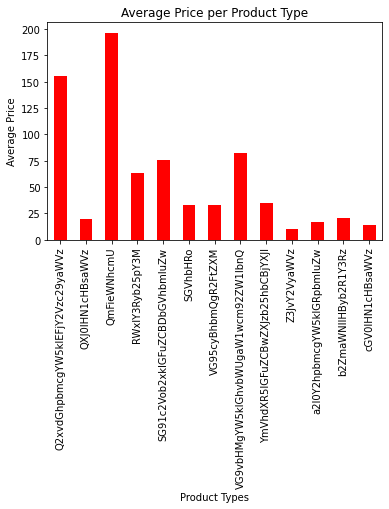

In [57]:
average_price.plot(kind='bar', color = 'red')
plt.xlabel("Product Types")
plt.ylabel("Average Price")
plt.title("Average Price per Product Type")

In [58]:
# convert average_price into dataframe
avg_price = pd.DataFrame(average_price)
avg_price = avg_price.reset_index() # reset index
avg_price.columns = ['category', 'Average Price'] # change column names
avg_price.head()

,category,Average Price
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,155.188819
1,QXJ0IHN1cHBsaWVz,19.471053
2,QmFieWNhcmU,196.509091
3,RWxlY3Ryb25pY3M,63.684000
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,75.675441


In [59]:
# converting the price into currency format
avg_price['Average Price'] = avg_price['Average Price'].astype('float').apply('${0:.2f}'.format)

In [60]:
avg_price.head()

,category,Average Price
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,$155.19
1,QXJ0IHN1cHBsaWVz,$19.47
2,QmFieWNhcmU,$196.51
3,RWxlY3Ryb25pY3M,$63.68
4,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,$75.68
